In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

# Encoding
from sklearn.preprocessing import LabelEncoder

# Modelling and report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [3]:
data_validation = pd.read_csv('test.csv')
data_validation.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
# data_train.set_index('encounter_id', inplace = True)
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


# <u> Data Exploration </u>

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [6]:
# Count the occurrences of "?" or NaN in each column
question_mark_nan_count = data_train.applymap(lambda x: x == '?' or pd.isna(x)).sum()

# Calculate the percentage of "?" or NaN values in each column
percentage_question_mark_nan = (question_mark_nan_count / len(data_train)) * 100

# Print the result
print(percentage_question_mark_nan)  # values in percent

# --> Almost no values for weight, glucose_test_result, alc_test_result

encounter_id                              0.000000
country                                   0.000000
patient_id                                0.000000
race                                      7.117188
gender                                    0.000000
age                                       4.993262
weight                                   96.847100
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications          

In [7]:
data_train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,71236.0,NaN,NaN,NaN,548798.623716,259704.723154,100000.0,323118.5,548370.0,774058.5,999980.0
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0


In [8]:
data_train['readmitted_binary'].value_counts()

readmitted_binary
No     63286
Yes     7950
Name: count, dtype: int64

In [9]:
data_train['readmitted_multiclass'].value_counts()

readmitted_multiclass
No          38405
>30 days    24881
<30 days     7950
Name: count, dtype: int64

# <u> Pre Processing by columns</u>

## Country

In [10]:
data_train = data_train.drop(columns=['country']) ## only 1 country

## Encounter ID

## Patient ID

## Race

In [11]:
# Replace '?' with NaN to treat them as missing values
data_train['race'].replace('?', np.nan, inplace=True)

# Calculate the frequency of each category in the 'race' variable
race_counts = data_train['race'].value_counts()

# Generate random samples based on the frequency of non-missing values
missing_indices = data_train[data_train['race'].isnull()].index
random_race_fill = np.random.choice(race_counts.index, size=len(missing_indices), p=race_counts / race_counts.sum())

# Fill missing values with random samples
data_train.loc[missing_indices, 'race'] = random_race_fill

In [12]:
data_train['race'].value_counts()

race
Caucasian          54576
AfricanAmerican    13681
Hispanic            1463
Other               1063
Asian                453
Name: count, dtype: int64

In [13]:
## Use One-Hot Encoding technique

# Use pd.get_dummies to one-hot encode the 'race' column
encoded_data_train = pd.get_dummies(data_train, columns=['race'], prefix='race')
data_train = encoded_data_train.replace({True: 1, False: 0})

data_train.head(8)


,encounter_id,patient_id,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,533253,70110,Female,[70-80),?,?,0,0,2,Emergency,...,No,No,[],No,>30 days,0,0,1,0,0
1,426224,29775006,Male,[50-60),?,?,0,0,0,Emergency,...,No,Yes,['insulin'],No,No,1,0,0,0,0
2,634063,80729253,Female,[60-70),?,?,0,0,1,NaN,...,Ch,Yes,"['glimepiride', 'insulin']",No,No,0,0,1,0,0
3,890610,2919042,Male,[60-70),?,MC,0,0,1,Emergency,...,No,No,[],No,No,1,0,0,0,0
4,654194,84871971,Female,[70-80),?,HM,1,0,0,Elective,...,No,No,[],No,>30 days,0,0,1,0,0
5,269878,279288,Female,[50-60),?,?,0,0,0,Emergency,...,No,No,[],No,>30 days,0,0,1,0,0
6,182051,1566405,Female,[50-60),?,UN,0,0,0,Emergency,...,Ch,Yes,"['metformin', 'glimepiride']",No,No,0,0,1,0,0
7,964239,60052095,Male,[70-80),?,MC,0,0,0,Elective,...,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No,0,0,0,0,1


## Gender

In [14]:
# Calculate the frequency of each category in the 'gender' variable
gender_counts = data_train['gender'].value_counts()

# Generate random samples based on the frequency of non-missing values
missing_indices_gender = data_train[data_train['gender'].isna()].index
random_gender_fill = np.random.choice(gender_counts.index, size=len(missing_indices_gender), p=gender_counts / gender_counts.sum())

# Fill missing values with random samples
data_train.loc[missing_indices_gender, 'gender'] = random_gender_fill



data_train['gender'] = data_train['gender'].map({'Male': 1, 'Female': 0})


# manually adjust 3 rows
data_train.loc[7057,'gender'] = 0
data_train.loc[43834,'gender'] = 0
data_train.loc[64443,'gender'] = 1

## Age

In [15]:
# Replace '?' with NaN to treat them as missing values
data_train['age'].replace('?', np.nan, inplace=True)

# Calculate the frequency of each category in the 'age' variable
age_counts = data_train['age'].value_counts()

# Generate random samples based on the frequency of non-missing values
missing_indices_age = data_train[data_train['age'].isnull()].index
random_age_fill = np.random.choice(age_counts.index, size=len(missing_indices_age), p=age_counts / age_counts.sum())

# Fill missing values with random samples
data_train.loc[missing_indices_age, 'age'] = random_age_fill



# One-Hot Encoding for 'age'
data_train = pd.get_dummies(data_train, columns=['age'], prefix='age').replace({True: 1, False: 0})

## Weight

In [16]:
data_train = data_train.drop(columns=['weight']) ## too many missing values as mentioned above
data_train

,encounter_id,patient_id,gender,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,533253,70110,0.0,?,0,0,2,Emergency,Family/GeneralPractice,127,...,0,0,0,0,0,0,0,1,0,0
1,426224,29775006,1.0,?,0,0,0,Emergency,?,128,...,0,0,0,0,0,1,0,0,0,0
2,634063,80729253,0.0,?,0,0,1,NaN,Family/GeneralPractice,94,...,0,0,0,0,0,0,1,0,0,0
3,890610,2919042,1.0,MC,0,0,1,Emergency,InternalMedicine,81,...,0,0,0,0,0,0,1,0,0,0
4,654194,84871971,0.0,HM,1,0,0,Elective,?,126,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,24531381,0.0,MC,0,1,0,Elective,InternalMedicine,90,...,0,0,0,0,0,0,0,0,1,0
71232,826429,4663818,0.0,?,0,0,0,Urgent,?,98,...,0,0,0,0,0,0,0,1,0,0
71233,332030,23397147,0.0,?,0,2,2,NaN,?,137,...,0,0,0,0,0,0,1,0,0,0
71234,757560,52161750,1.0,BC,0,0,2,Emergency,Emergency/Trauma,123,...,0,0,0,0,0,0,1,0,0,0


## Payer Code

In [17]:
data_train = data_train.drop(columns=['payer_code']) ## too many missing values as mentioned above

## Outpatient_visits_in_previous_year

In [18]:
## we categorize in 
## 1: Once or more 
## 0: Never

data_train['outpatient_visits_in_previous_year'] = data_train['outpatient_visits_in_previous_year'].map(lambda x: 0 if x > 0 else 1)
print(data_train['outpatient_visits_in_previous_year'].value_counts())
data_train['outpatient_visits_in_previous_year'].value_counts().sum()

outpatient_visits_in_previous_year
1    59587
0    11649
Name: count, dtype: int64


71236

## Emergency_visits_in_previous_year

In [19]:
## since 89% have 0, we categorize again by 1: once or more and 0: Never
data_train['emergency_visits_in_previous_year'] = data_train['emergency_visits_in_previous_year'].map(lambda x: 0 if x > 0 else 1)

In [20]:
print(data_train['emergency_visits_in_previous_year'].value_counts())
data_train['emergency_visits_in_previous_year'].value_counts().sum()

emergency_visits_in_previous_year
1    63242
0     7994
Name: count, dtype: int64


71236

## Inpatient_visits_in_previous_year	

In [21]:
data_train['inpatient_visits_in_previous_year'] = data_train['inpatient_visits_in_previous_year'].map(lambda x: 0 if x > 0 else 1)
print(data_train['inpatient_visits_in_previous_year'].value_counts())
data_train['inpatient_visits_in_previous_year'].value_counts().sum()

inpatient_visits_in_previous_year
1    47231
0    24005
Name: count, dtype: int64


71236

## Admission_type

In [22]:
data_train['admission_type'].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

In [23]:
# Replace '?' with NaN to treat them as missing values
data_train['admission_type'].replace('?', np.nan, inplace=True)

# Calculate the frequency of each category in the 'age' variable
admission_type_counts = data_train['admission_type'].value_counts()

# Generate random samples based on the frequency of non-missing values
missing_indices_admission = data_train[data_train['admission_type'].isnull()].index
random_admission_fill = np.random.choice(admission_type_counts.index, size=len(missing_indices_admission), p=admission_type_counts / admission_type_counts.sum())

# Fill missing values with random samples
data_train.loc[missing_indices_admission, 'admission_type'] = random_admission_fill

# One-Hot Endcoding
data_train = pd.get_dummies(data_train, columns=['admission_type'], prefix='admission_type').replace({True: 1, False: 0})


## Medical_specialty

In [24]:
data_train = data_train.drop(columns=['medical_specialty']) ## too many missing values as mentioned above

## Average_pulse_bpm

In [25]:
data_train['average_pulse_bpm']

0        127
1        128
2         94
3         81
4        126
        ... 
71231     90
71232     98
71233    137
71234    123
71235     62
Name: average_pulse_bpm, Length: 71236, dtype: int64

## Discharge_disposition

In [26]:
# Replace '?' with NaN to treat them as missing values in 'discharge_disposition'
data_train['discharge_disposition'].replace('?', np.nan, inplace=True)

# Calculate the frequency of each category in the 'discharge_disposition' variable
discharge_disposition_counts = data_train['discharge_disposition'].value_counts()

# Generate random samples based on the frequency of non-missing values
missing_indices_discharge = data_train[data_train['discharge_disposition'].isnull()].index
random_discharge_fill = np.random.choice(discharge_disposition_counts.index, size=len(missing_indices_discharge), p=discharge_disposition_counts / discharge_disposition_counts.sum())

# Fill missing values with random samples
data_train.loc[missing_indices_discharge, 'discharge_disposition'] = random_discharge_fill


In [27]:
# One-Hot Endcoding
data_train = pd.get_dummies(data_train, columns=['discharge_disposition'], prefix='discharge_disposition').replace({True: 1, False: 0})

## Admission_source

In [28]:
# Replace '?' with NaN to treat them as missing values in 'admission_source'
data_train['admission_source'].replace('?', np.nan, inplace=True)

# Calculate the frequency of each category in the 'admission_source' variable
admission_source_counts = data_train['admission_source'].value_counts()

# Generate random samples based on the frequency of non-missing values
missing_indices_admission_source = data_train[data_train['admission_source'].isnull()].index
random_admission_source_fill = np.random.choice(admission_source_counts.index, size=len(missing_indices_admission_source), p=admission_source_counts / admission_source_counts.sum())

# Fill missing values with random samples
data_train.loc[missing_indices_admission_source, 'admission_source'] = random_admission_source_fill

# One-Hot Encoding for 'admission_source'
data_train = pd.get_dummies(data_train, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})


## length_of_stay_in_hospital, number_lab_tests, non_lab_procedures, number_of_medications

In [29]:
## no need of pre processing

## primary_diagnosis, secondary_diagnosis, additional_diagnosis

In [30]:
## LabelEncoding all of them

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to 'primary_diagnosis' column
data_train['primary_diagnosis'] = label_encoder.fit_transform(data_train['primary_diagnosis'])

# Apply label encoding to 'secondary_diagnosis' column
data_train['secondary_diagnosis'] = label_encoder.fit_transform(data_train['secondary_diagnosis'])

# Apply label encoding to 'additional_diagnosis' column
data_train['additional_diagnosis'] = label_encoder.fit_transform(data_train['additional_diagnosis'])


## number_diagnoses

In [31]:
## no further pre processing

## glucose_test_result, C

In [32]:
data_train = data_train.drop(columns=['glucose_test_result', 'a1c_test_result']) ## too many missing values as mentioned above

## change_in_meds_during_hospitalization

In [33]:
data_train['change_in_meds_during_hospitalization'] = data_train['change_in_meds_during_hospitalization'].map({'Ch': 1, 'No': 0})

## prescribed_diabetes_meds

In [34]:
data_train['prescribed_diabetes_meds'] = data_train['prescribed_diabetes_meds'].map({'Yes': 1, 'No': 0})

## medication

In [35]:
# Extract unique medications from the 'medication' column
unique_medications = set()

# Iterate through each row in the 'medication' column and add the medications to the set
for medication_list in data_train['medication']:
    medications = medication_list.strip('[]').replace(" ", "").split(',')
    unique_medications.update(medications)

# Convert the set to a list to count the unique medications
unique_medications_list = list(unique_medications)

# Create binary columns for each unique medication and set values to 1 if present, 0 if not
for medication in unique_medications_list:
    data_train[medication] = data_train['medication'].apply(lambda x: 1 if medication in x else 0)

# Drop the original 'medication' column
data_train = data_train.drop(columns=['medication'])



## readmitted_binary

In [36]:
## Binary target: Yes if patient was readmitted in <30 days, No otherwise

In [37]:
# data_train['readmitted_binary'] = data_train['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train['readmitted_binary'] = data_train['readmitted_binary'].map({'Yes': 1, 'No': 0})

## readmitted multiclass

In [38]:
##     Multiclass target: “<30 days” if patient was readmitted in less than 30 days after being discharged. 
##     “>30 days if patient was readmitted to the hospital but only after more than 30
##     days after the current discharge. No otherwise.

In [39]:
# No -> 0    ,     <30 days -> 1   , >30 days -> 2
data_train['readmitted_multiclass'] = data_train['readmitted_multiclass'].map({'No': 0, '<30 days': 1, '>30 days': 2})
data_train['readmitted_multiclass']

0        2
1        0
2        0
3        0
4        2
        ..
71231    0
71232    0
71233    1
71234    0
71235    2
Name: readmitted_multiclass, Length: 71236, dtype: int64

# Try Models

In [40]:
data_train = data_train.astype(float)

In [41]:
# Create a Min-Max scaler instance
scaler = MinMaxScaler()

# Fit and transform the DataFrame to scale all columns between 0 and 1
data_train_scaled = pd.DataFrame(scaler.fit_transform(data_train), columns=data_train.columns)

data_train_scaled

,encounter_id,patient_id,gender,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,...,'insulin','glimepiride-pioglitazone','metformin','acarbose','pioglitazone','glipizide','glimepiride','tolazamide','miglitol','repaglinide'
0,0.481403,0.000369,0.0,1.0,1.0,0.0,0.848101,0.076923,0.391667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.362479,0.157121,1.0,1.0,1.0,1.0,0.860759,1.000000,0.583333,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.593417,0.426006,0.0,1.0,1.0,0.0,0.430380,0.384615,0.491667,0.166667,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.878475,0.015403,1.0,1.0,1.0,0.0,0.265823,0.384615,0.391667,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.615785,0.447867,0.0,0.0,1.0,1.0,0.835443,0.384615,0.383333,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,0.622414,0.129451,0.0,1.0,0.0,1.0,0.379747,0.461538,0.416667,0.166667,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71232,0.807161,0.024610,0.0,1.0,1.0,1.0,0.481013,0.615385,0.158333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71233,0.257817,0.123465,0.0,1.0,0.0,0.0,0.974684,0.307692,0.200000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71234,0.730638,0.275256,1.0,1.0,1.0,0.0,0.797468,0.076923,0.275000,0.166667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


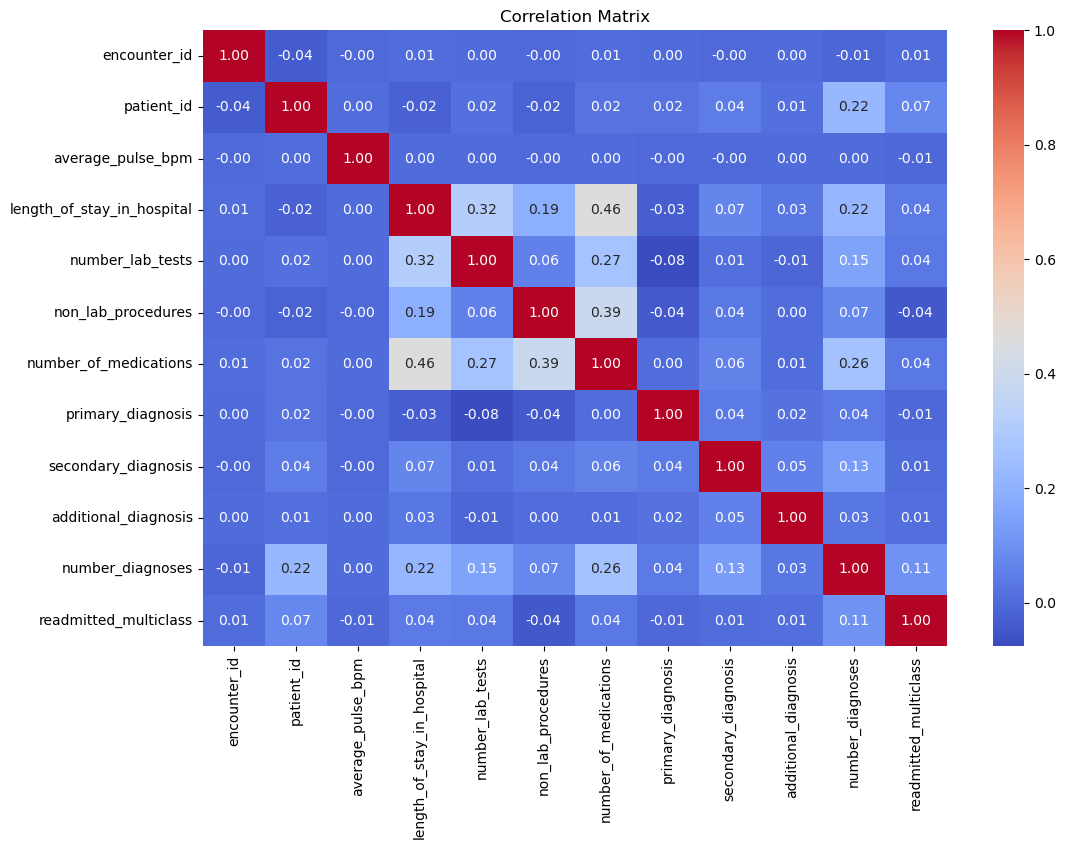

In [42]:
# Load your dataset into data_train (assuming it's already loaded)

# Exclude binary columns
non_binary_columns = [col for col in data_train.columns if len(data_train[col].unique()) > 2]

# Create a new DataFrame with non-binary columns
data_train_filtered = data_train[non_binary_columns]

# Create a Min-Max scaler instance
scaler = MinMaxScaler()

# Fit and transform the DataFrame to scale all columns between 0 and 1
data_train_filtered_scaled = pd.DataFrame(scaler.fit_transform(data_train_filtered), columns=data_train_filtered.columns)

# Calculate the correlation matrix
correlation_matrix = data_train_filtered_scaled.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



## Haven't dropped or selected anything yet

In [43]:
# Fit and transform the DataFrame to scale all columns between 0 and 1
data_train_scaled = pd.DataFrame(scaler.fit_transform(data_train), columns=data_train.columns)

In [44]:
# Define X and y
X = data_train_scaled.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y = data_train_scaled['readmitted_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Overall Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Calculate the F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Calculate the overall F1 score (macro-average)
overall_f1_score = sum(f1_scores) / len(f1_scores)

print(f"Hence the overall F1 score is: \n {overall_f1_score}")


Overall Accuracy: 0.8907916900617631
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     12695
         1.0       0.29      0.00      0.00      1553

    accuracy                           0.89     14248
   macro avg       0.59      0.50      0.47     14248
weighted avg       0.83      0.89      0.84     14248

Hence the overall F1 score is: 
 0.4723987723987724


In [45]:
# Create and fit a new model (replace with your chosen model)
# For example, let's assume you want to use a RandomForestClassifier
new_model = RandomForestClassifier()
new_model.fit(X_train, y_train)

# Make predictions with the new model
y_pred = new_model.predict(X_test)

# Evaluate the new model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Overall Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Calculate the F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Calculate the overall F1 score (macro-average)
overall_f1_score = sum(f1_scores) / len(f1_scores)

print(f"Hence the overall F1 score is: \n {overall_f1_score}")

Overall Accuracy: 0.8912829870859068
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     12695
         1.0       0.75      0.00      0.01      1553

    accuracy                           0.89     14248
   macro avg       0.82      0.50      0.48     14248
weighted avg       0.88      0.89      0.84     14248

Hence the overall F1 score is: 
 0.4750892811805106


In [46]:
# # Create and fit a Support Vector Machine (SVM) classifier
# svm_model = SVC()
# svm_model.fit(X_train, y_train)

# # Make predictions with the SVM model
# y_pred = svm_model.predict(X_test)

# # Evaluate the SVM model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f"Overall Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_rep)

# # Calculate the F1 score for each class
# f1_scores = f1_score(y_test, y_pred, average=None)

# # Calculate the overall F1 score (macro-average)
# overall_f1_score = sum(f1_scores) / len(f1_scores)

# print(f"Hence the overall F1 score is: \n {overall_f1_score}")

In [47]:
# # Create and fit an XGBoost classifier
# xgb_model = XGBClassifier()
# xgb_model.fit(X_train, y_train)

# # Make predictions with the XGBoost model
# y_pred = xgb_model.predict(X_test)

# # Evaluate the XGBoost model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f"Overall Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_rep)

# # Calculate the F1 score for each class
# f1_scores = f1_score(y_test, y_pred, average=None)

# # Calculate the overall F1 score (macro-average)
# overall_f1_score = sum(f1_scores) / len(f1_scores)

# print(f"Hence the overall F1 score is: \n {overall_f1_score}")